In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
dataset=pd.read_csv('Maternal Health Risk Data Set.csv')

In [3]:
dataset

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [5]:
dataset.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [6]:
dataset['Age'].values

array([25, 35, 29, ..., 35, 43, 32], dtype=int64)

In [7]:
X=dataset.iloc[:,[0,1,2,3,4,5]].values

In [8]:
X[0]

array([ 25., 130.,  80.,  15.,  98.,  86.])

In [9]:
Y=dataset.iloc[:,[6]].values

In [10]:
Y


array([['high risk'],
       ['high risk'],
       ['high risk'],
       ...,
       ['high risk'],
       ['high risk'],
       ['mid risk']], dtype=object)

In [11]:
Xtrain,Xtest,Ytrain,Ytes=train_test_split(X,Y,test_size=0.2,random_state=100)

In [12]:
classifier=KNeighborsClassifier(n_neighbors=3)

In [13]:

Ytrain=np.ravel(Ytrain)
classifier.fit(Xtrain,Ytrain)

KNeighborsClassifier(n_neighbors=3)

In [14]:
Ypred=classifier.predict(Xtest)

In [15]:
from sklearn.metrics import accuracy_score


In [16]:
score=accuracy_score(Ypred,Ytes)
print(score)

0.7487684729064039


In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
dtclassifier=DecisionTreeClassifier()

In [19]:
dtclassifier.fit(Xtrain,Ytrain)

DecisionTreeClassifier()

In [20]:
Ypred=classifier.predict(Xtest)

In [21]:
score=accuracy_score(Ypred,Ytes)
print(score)

0.7487684729064039


In [22]:
from sklearn.ensemble import RandomForestRegressor#Random Forest Regression Model

In [23]:
dataset['RiskLevel'].replace({"high risk": "3", "mid risk": "2", "low risk" : "1"}, inplace=True)
dataset['RiskLevel'] = dataset['RiskLevel'].astype(float)
dataset.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,3.0
1,35,140,90,13.0,98.0,70,3.0
2,29,90,70,8.0,100.0,80,3.0
3,30,140,85,7.0,98.0,70,3.0
4,35,120,60,6.1,98.0,76,1.0


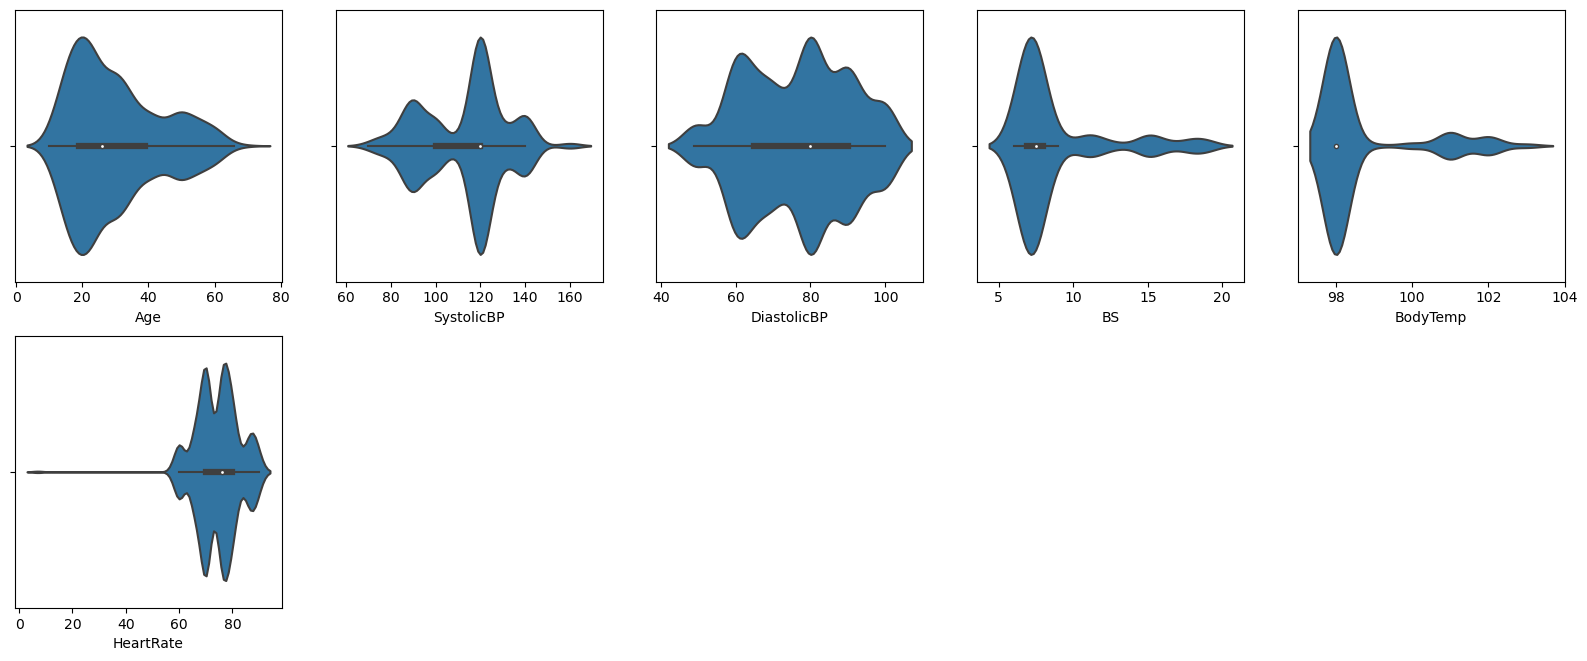

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
cols = [i for i in dataset.columns]
cols = [i for i in cols if i not in ['RiskLevel']]
plt.figure(figsize=(20,12))
for i in enumerate(cols): 
    num = i[0]+1
    plt.subplot(3,5,num)
    sns.violinplot(data=dataset, x=i[1])
plt.show()

c:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


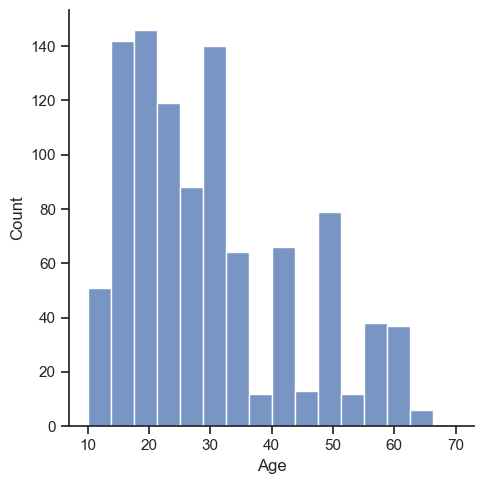

c:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


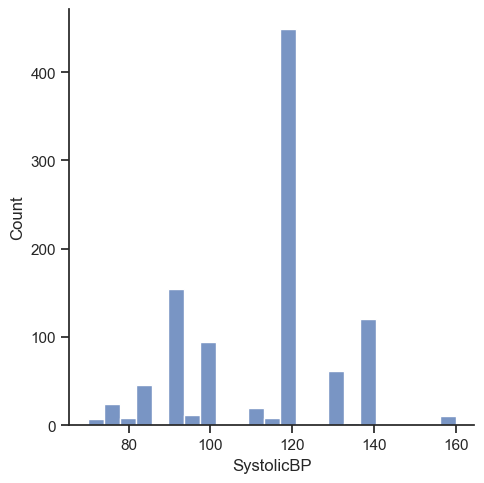

c:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


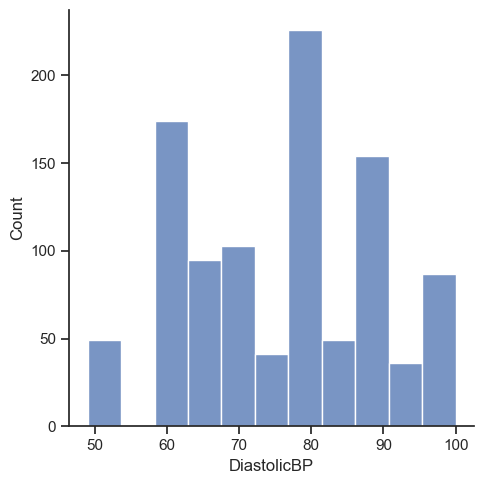

c:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


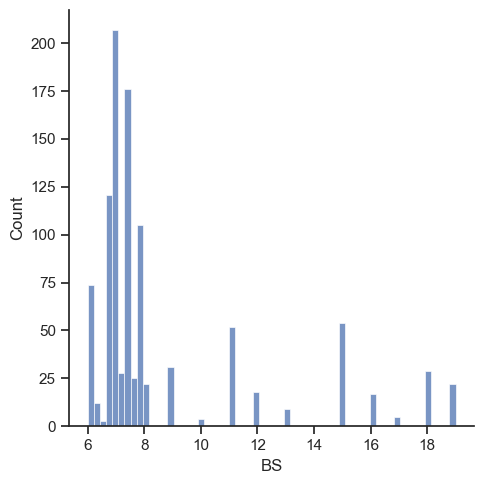

c:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


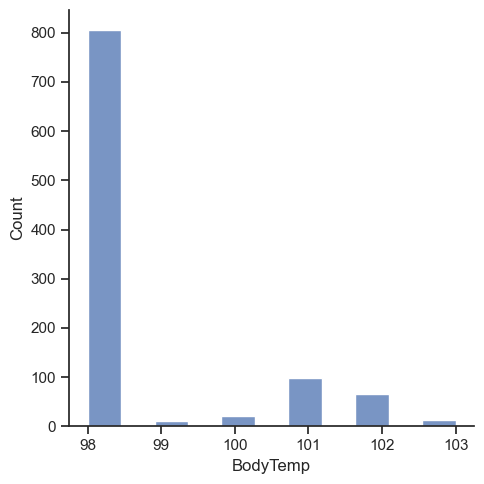

c:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


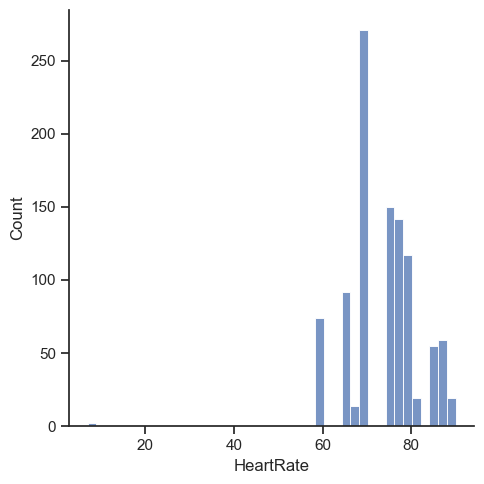

In [25]:
for column in dataset.columns[:6]:  # Loop over all columns except 'Location'
    sns.set()
    sns.set(style="ticks")
    sns.displot(dataset[column])
    plt.show()

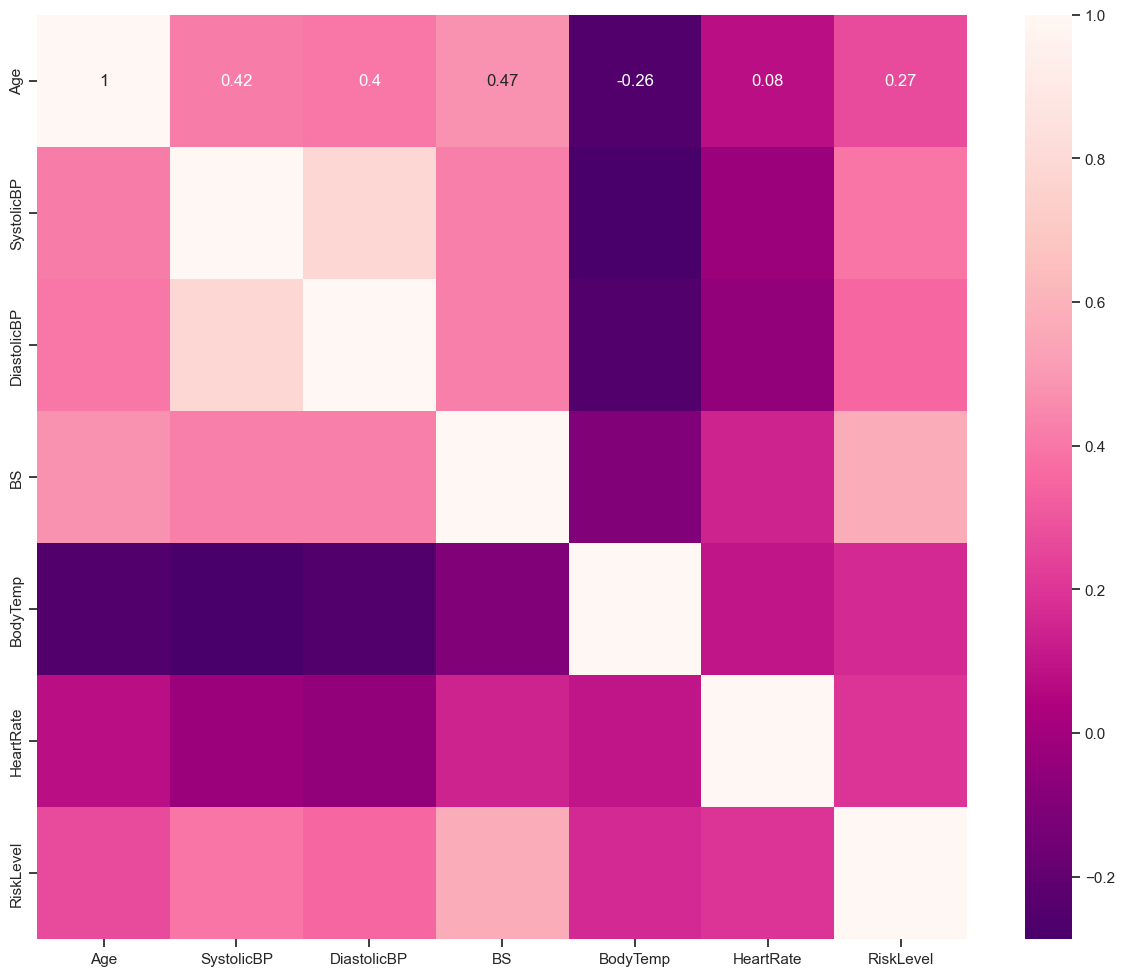

In [26]:
plt.figure(figsize=(15,12))
sns.heatmap(dataset.corr(),annot=True,cmap='RdPu_r')
plt.show()

In [27]:
train, test = train_test_split(dataset, test_size=0.2, random_state=25)

print(f"No. of training examples: {train.shape[0]}")
print(f"No. of testing examples: {test.shape[0]}")

No. of training examples: 811
No. of testing examples: 203


In [28]:
y_test=test['RiskLevel']
x_test=test.drop('RiskLevel', axis=1)
x_test.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
805,19,120,80,7.0,98.0,70
298,23,90,60,7.7,98.0,76
243,32,120,65,6.0,101.0,76
262,40,160,100,19.0,98.0,77
61,15,80,60,7.0,98.0,80


In [29]:
#Setting training data into x_train and y_train
x_train=train.drop('RiskLevel',axis=1)
y_train=train['RiskLevel']

#Shapes of x_train,y_train and test data
x_train.shape, y_train.shape, x_test.shape

((811, 6), (811,), (203, 6))

In [30]:
random_model=RandomForestRegressor(n_estimators=50)
random_model.fit(x_train,y_train)
print(random_model.score(x_train,y_train))

#Making predictions on test set 
random_predict=random_model.predict(x_test)

random_result=pd.DataFrame({'Id':test.index,'Predicted Risk':random_predict,'Actual Risk':y_test})
print(random_result)


0.8952414690465346
      Id  Predicted Risk  Actual Risk
805  805        1.835208          2.0
298  298        1.040000          1.0
243  243        1.980000          2.0
262  262        3.000000          3.0
61    61        1.060000          1.0
..   ...             ...          ...
550  550        2.841108          2.0
578  578        2.372410          3.0
698  698        1.075000          1.0
231  231        3.000000          3.0
505  505        1.003333          1.0

[203 rows x 3 columns]


In [31]:

classifier.fit(x_train,y_train)
print(classifier.score(x_train,y_train))

#Making predictions on test set 
knn_predict=classifier.predict(x_test)

knn_result=pd.DataFrame({'Id':test.index,'Predicted Risk':knn_predict,'Actual Risk':y_test})
print(knn_result)

0.8828606658446363
      Id  Predicted Risk  Actual Risk
805  805             2.0          2.0
298  298             1.0          1.0
243  243             2.0          2.0
262  262             3.0          3.0
61    61             1.0          1.0
..   ...             ...          ...
550  550             3.0          2.0
578  578             3.0          3.0
698  698             1.0          1.0
231  231             3.0          3.0
505  505             1.0          1.0

[203 rows x 3 columns]


In [32]:
dtclassifier.fit(x_train,y_train)
print(dtclassifier.score(x_train,y_train))

#Making predictions on test set 
dt_predict=dtclassifier.predict(x_test)

dt_result=pd.DataFrame({'Id':test.index,'Predicted Risk':dt_predict,'Actual Risk':y_test})
print(dt_result)

0.9321824907521579
      Id  Predicted Risk  Actual Risk
805  805             2.0          2.0
298  298             1.0          1.0
243  243             2.0          2.0
262  262             3.0          3.0
61    61             1.0          1.0
..   ...             ...          ...
550  550             3.0          2.0
578  578             3.0          3.0
698  698             1.0          1.0
231  231             3.0          3.0
505  505             1.0          1.0

[203 rows x 3 columns]


In [33]:
import joblib

In [34]:
joblib.dump(dtclassifier,'dtmodel_for_risk.pkl')

['dtmodel_for_risk.pkl']